Raw shape: (1067371, 8)
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
After cleaning: (1008745, 6)
invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
country        0
dtype: int64
Basket shape: (40302, 5426)
item     *Boombox Ipod Classic  *USB Office Glitter Lamp  \
invoice                                                    
489434                       0                         0   
489435                       0                         0   
489436                       0         

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori @ support=0.020: 259 itemsets in 211.338s


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori @ support=0.030: 89 itemsets in 15.837s


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-Growth @ support=0.020: 259 itemsets in 57.098s


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


FP-Growth @ support=0.030: 89 itemsets in 51.560s

Sample frequent itemsets (FP-Growth @ lowest support):
    support                              itemsets
0  0.135477  (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.097266            (REGENCY CAKESTAND 3 TIER)
2  0.081212             (JUMBO BAG RED RETROSPOT)
3  0.069674       (ASSORTED COLOUR BIRD ORNAMENT)
4  0.066399                       (PARTY BUNTING)
5  0.058335             (LUNCH BAG  BLACK SKULL.)
6  0.057814              (JUMBO STORAGE BAG SUKI)
7  0.057317      (STRAWBERRY CERAMIC TRINKET BOX)
8  0.054414   (JUMBO SHOPPER VINTAGE RED PAISLEY)
9  0.053471               (HEART OF WICKER SMALL)


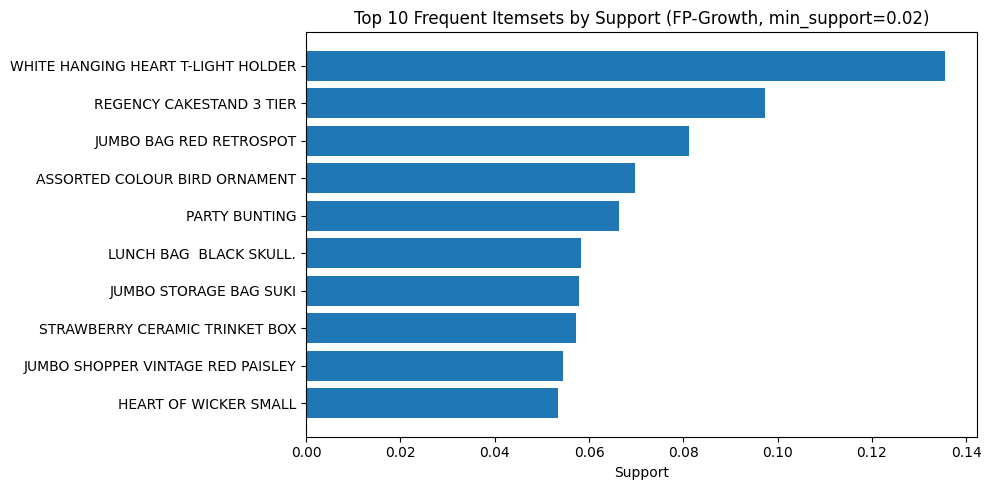


Top rules (preview):
                          antecedents                        consequents  \
26   (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
27  (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   
7   (ROSES REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
8   (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER)   
31       (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   
32         (ALARM CLOCK BAKELIKE RED)       (ALARM CLOCK BAKELIKE GREEN)   
35             (DOLLY GIRL LUNCH BOX)               (SPACEBOY LUNCH BOX)   
34               (SPACEBOY LUNCH BOX)             (DOLLY GIRL LUNCH BOX)   
5    (SWEETHEART CERAMIC TRINKET BOX)   (STRAWBERRY CERAMIC TRINKET BOX)   
6    (STRAWBERRY CERAMIC TRINKET BOX)   (SWEETHEART CERAMIC TRINKET BOX)   

     support  confidence       lift  
26  0.021215    0.834146  25.031844  
27  0.021215    0.636634  25.031844  
7   0.025408    0.725726  2

In [2]:


# Main  libraries for data wrangling, I/O, timing, algorithms, and plotting.
import pandas as pd
import numpy as np
from pathlib import Path
from time import perf_counter
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

BASE = Path(r"C:\Users\Hp\Videos\DSA")
CSV_PATH  = BASE / "online_retail_II.csv"
XLSX_PATH = BASE / "online_retail_II.xlsx"

# We create an outputs directory to store figures and CSVs generated by the analysis.
OUT_DIR = BASE / "outputs"
OUT_DIR.mkdir(exist_ok=True)

# load Data
if XLSX_PATH.exists():
    df_09 = pd.read_excel(XLSX_PATH, sheet_name="Year 2009-2010")
    df_10 = pd.read_excel(XLSX_PATH, sheet_name="Year 2010-2011")
    raw = pd.concat([df_09, df_10], ignore_index=True)
elif CSV_PATH.exists():
    raw = pd.read_csv(CSV_PATH, encoding_errors="ignore")
else:
    raise FileNotFoundError("Put 'online_retail_II.xlsx' or 'online_retail_II.csv' in C:\\Users\\Hp\\Videos\\DSA")

#  Print the raw shape and show a quick peek for sanity-checking.
print("Raw shape:", raw.shape)
print(raw.head(3))

# Cleaning & Preprocessing

# Standerize the column names to lowercase snake_case for consistent handling.
df = raw.copy()
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Remap the  column name variants to canonical names if needed.
col_map = {
    "invoiceno":"invoice",
    "invoice_no":"invoice",
    "invoice_no.":"invoice",
    "stock_code":"stockcode"
}
for k, v in col_map.items():
    if k in df.columns and v not in df.columns:
        df.rename(columns={k: v}, inplace=True)

# Select the core columns we need for transactions and items (tolerating what's available).
needed_candidates = ["invoice","stockcode","description","quantity","invoicedate","unitprice","customerid","country"]
needed = [c for c in needed_candidates if c in df.columns]
df = df[needed].copy()

# process of removing rows with missing critical identifiers (invoice, stockcode, description) to avoid broken baskets.
drop_keys = [c for c in ["invoice","stockcode","description"] if c in df.columns]
df = df.dropna(subset=drop_keys)

# Removal of perfect duplicate rows to prevent double-counting of identical lines.
#Removes duplicate rows, filters out records with non-positive quantity or unit price,
#converts the invoice column to string, and displays the dataset size and top columns with missing values.
df = df.drop_duplicates()
if "quantity" in df.columns:
    df = df[df["quantity"] > 0]
if "unitprice" in df.columns:
    df = df[df["unitprice"] > 0]
df["invoice"] = df["invoice"].astype(str)
print("After cleaning:", df.shape)
print(df.isna().sum().sort_values(ascending=False).head(10))

#BASKETIZATION (Invoice × Item one-hot).
df["item"] = df["description"].astype(str).str.strip()

basket = (
    df.groupby(["invoice","item"])["quantity"]
      .sum()
      .unstack(fill_value=0)
)
basket = (basket > 0).astype(int)

#We confirm the basket matrix shape and show a small head for inspection.
print("Basket shape:", basket.shape)
print(basket.head(3))

#Frequent Itemsets (Apriori & FP-Growth)
supports = [0.02, 0.03] 

# Run both algorithms at both supports while timing execution and counting results.
#The code below compares Apriori and FP-Growth on the basket dataset for various support values, measuring runtime, itemset count, and storing results for performance comparison.
results = {}
for algo_name, algo in [("Apriori", apriori), ("FP-Growth", fpgrowth)]:
    algo_runs = {}
    for s in supports:
        t0 = perf_counter()
        fis = algo(basket, min_support=s, use_colnames=True)
        dt = perf_counter() - t0
        fis = fis.sort_values("support", ascending=False).reset_index(drop=True)
        algo_runs[s] = {"fis": fis, "time_sec": round(dt, 3), "count": len(fis)}
        print(f"{algo_name} @ support={s:.3f}: {len(fis)} itemsets in {dt:.3f}s")
    results[algo_name] = algo_runs

# distribution of a sample of the richest run (often FP-Growth at lower support).
sample_fis = results["FP-Growth"][supports[0]]["fis"].head(10)
print("\nSample frequent itemsets (FP-Growth @ lowest support):")
print(sample_fis)

# plotting of Top-10 Frequent Itemsets by Support

# Define a helper function (visualization) to plot the 10 most frequent itemsets as a horizontal bar chart.
def plot_top_itemsets(fis, title, savepath=None):
    top = fis.nlargest(10, "support").copy()
    if top.empty:
        print("No itemsets to plot for these parameters.")
        return
    top["itemset_str"] = top["itemsets"].apply(lambda x: ", ".join(sorted(list(x))))
    plt.figure(figsize=(10,5))
    plt.barh(top["itemset_str"], top["support"])
    plt.gca().invert_yaxis()
    plt.xlabel("Support")
    plt.title(title)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
    plt.show()
fis_for_plot = results["FP-Growth"][supports[0]]["fis"]
plot_top_itemsets(
    fis_for_plot,
    title=f"Top 10 Frequent Itemsets by Support (FP-Growth, min_support={supports[0]:.2f})",
    savepath=OUT_DIR / "top_itemsets_support.png"
)
 
# Assocciation rules (confidence, lift, support)
# Selcet the richer frequent itemset table as the basis for generating rules.
fis_base = results["FP-Growth"][supports[0]]["fis"]
rules = association_rules(fis_base, metric="confidence", min_threshold=0.3)
rules = rules.sort_values(["lift","confidence","support"], ascending=[False, False, False])
print("\nTop rules (preview):")
print(rules.head(10)[["antecedents","consequents","support","confidence","lift"]])
rules_out = OUT_DIR / "rules_all.csv"
rules[["antecedents","consequents","support","confidence","lift","leverage","conviction"]].to_csv(rules_out, index=False)
print(f"Saved all rules to: {rules_out}")

# Filter for “interesting” rules with strong lift, decent confidence, and non-trivial support so that we can highlight them..
interesting = rules.query("lift >= 3 and confidence >= 0.5 and support >= 0.01").copy()
if interesting.empty:
    interesting = rules.query("lift >= 2 and confidence >= 0.4 and support >= 0.005").copy()
top3 = interesting.head(3).copy()
top3_out = OUT_DIR / "rules_top3.csv"
top3.to_csv(top3_out, index=False)
print(f"Saved top3 rules to: {top3_out}")
def set_to_str(s): 
    return ", ".join(sorted(list(s)))

print("\n=== Three Interesting Rules (auto-selected) ===")
for i, row in top3.iterrows():
    A = set_to_str(row["antecedents"])
    C = set_to_str(row["consequents"])
    sup = row["support"]
    conf = row["confidence"]
    lift = row["lift"]
    print(f"- Rule: {{{A}}} → {{{C}}} | support={sup:.3f}, confidence={conf:.3f}, lift={lift:.2f}")
    print("  # This implies the consequent is ~{:.2f}× more likely with the antecedent than at random; consider bundles or 'Frequently Bought Together'.".format(lift))

# Algorithm compariosn (Apriori vs FP-Growth)
# We summarize runtime and number of itemsets by algorithm and support for a quick performance view.
cmp_rows = []
for algo in results:
    for s in supports:
        cmp_rows.append({
            "Algorithm": algo,
            "Min Support": s,
            "#Itemsets": results[algo][s]["count"],
            "Time (s)": results[algo][s]["time_sec"]
        })
cmp_df = pd.DataFrame(cmp_rows).sort_values(["Min Support","Algorithm"])
print("\nAlgorithm comparison:")
print(cmp_df)

# After comparison we then save the comparison table to CSV.
cmp_out = OUT_DIR / "algo_comparison.csv"
cmp_df.to_csv(cmp_out, index=False)
print(f"Saved comparison to: {cmp_out}")